<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_week3.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color="orange">**在MINST-FASHION上实现神经网络**

In [1]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [53]:
lr = 0.15
gamma = 0
epochs = 10
bs = 128

**导入minst-fashion**

In [3]:
import torchvision
import torchvision.transforms as transforms

**<font color="orange">
Dataloader,TensorDataset主要是对数据、归纳形式进行变换**

**<font color="yellow">
torchvision.transforms是对数据集的数字本身进行修改的**

In [ ]:
mnist = torchvision.datasets.FashionMNIST(
    root=r"/content/sample_data" # 根目录
    ,train=True # 是否用于训练
    ,download=True
    ,transform=transforms.ToTensor() # 将数据集处理成tensor
)

In [6]:
mnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/sample_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
len(mnist)

60000

In [8]:
mnist.data.shape # (sample_size, H-height, W-width, C-channel)

torch.Size([60000, 28, 28])

In [9]:
mnist.targets.unique().shape # 类别数

torch.Size([10])

In [13]:
mnist.classes # 标签的类别

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
import matplotlib.pyplot as plt
import numpy as np

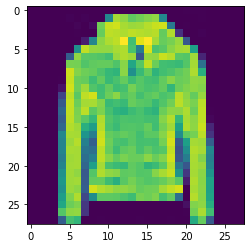

In [11]:
plt.imshow(mnist[59556][0].view(28,28).numpy()); # imageshow

In [23]:
# 直接进行小批量划分
batchdata = DataLoader(mnist,batch_size=bs,shuffle=True)
len(batchdata)

469

In [15]:
for x,y in batchdata:
  print(x.shape)
  print(y.shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [26]:
# x(四维)—>二维(个数，其他)
input_ = mnist.data[0].numel() # 特征的个数，除第一维以后所有的维数的乘积
output_ = len(mnist.targets.unique())
input_, output_

(784, 10)

In [55]:
# 模型架构定义
class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super(Model,self).__init__()
    self.normalize = nn.BatchNorm2d(num_features=1)
    self.linear1 = nn.Linear(in_features,128,bias=True)
    self.output = nn.Linear(128,out_features,bias=True)

  def forward(self,x):
    x = self.normalize(x)
    x = x.reshape(-1,28*28)
    z1 = self.linear1(x)
    sigma1 = torch.relu(z1)
    z2 = self.output(sigma1)
    sigma2 = torch.log_softmax(z2,dim=1) # 要检测准确率
    return sigma2

In [56]:
# 定义训练函数(损失函数+优化算法+反向传播)
def fit(net,batchdata,lr,epochs,gamma):
  criterion = nn.NLLLoss()
  opt = optim.SGD(net.parameters(),lr=lr,momentum=gamma)

  correct = 0
  samples = 0
  for epoch in range(epochs):
    for batch_idx, (x,y) in enumerate(batchdata):
      y = y.view(x.shape[0]) # 将y变成1维
      sigma = net.forward(x)
      loss = criterion(sigma,y)
      loss.backward()
      opt.step()
      opt.zero_grad()

      # 求解准确率
      yhat = torch.max(sigma,1)[1] # 索引代表类别，第二个结果中索引1的部分
      correct += torch.sum(yhat==y)

      # 每训练一个batch的数据，数据见过的就增加x.shape[0]个
      samples += x.shape[0]

      if(batch_idx+1) % 125 ==0 or batch_idx == len(batchdata)-1:
        print("Epoch{}:[{}/{}({:.0f}%)]\tLoss:{:.6f}\tAccuracy:{:.3f}%".format(
                       epoch+1
                       ,samples
                       ,len(batchdata.dataset)*epochs
                       ,100*samples/(len(batchdata.dataset)*epochs)
                       ,loss.data.item()
                       ,float((correct*100)/samples)))
    # 分子代表：已经查看过的数据有多少
    # 分母代表：在现有的epochs中，模型共有多少数据

In [57]:
torch.random.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
fit(net,batchdata,lr=lr,epochs=epochs,gamma=gamma)

Epoch1:[16000/600000(3%)]	Loss:0.557164	Accuracy:73.500%
Epoch1:[32000/600000(5%)]	Loss:0.402450	Accuracy:77.297%
Epoch1:[48000/600000(8%)]	Loss:0.444356	Accuracy:79.527%
Epoch1:[60000/600000(10%)]	Loss:0.237584	Accuracy:80.622%
Epoch2:[76000/600000(13%)]	Loss:0.316223	Accuracy:81.667%
Epoch2:[92000/600000(15%)]	Loss:0.369680	Accuracy:82.435%
Epoch2:[108000/600000(18%)]	Loss:0.255088	Accuracy:83.064%
Epoch2:[120000/600000(20%)]	Loss:0.245632	Accuracy:83.454%
Epoch3:[136000/600000(23%)]	Loss:0.242432	Accuracy:83.940%
Epoch3:[152000/600000(25%)]	Loss:0.277982	Accuracy:84.313%
Epoch3:[168000/600000(28%)]	Loss:0.510769	Accuracy:84.628%
Epoch3:[180000/600000(30%)]	Loss:0.296304	Accuracy:84.897%
Epoch4:[196000/600000(33%)]	Loss:0.338607	Accuracy:85.189%
Epoch4:[212000/600000(35%)]	Loss:0.241895	Accuracy:85.470%
Epoch4:[228000/600000(38%)]	Loss:0.322951	Accuracy:85.693%
Epoch4:[240000/600000(40%)]	Loss:0.376987	Accuracy:85.825%
Epoch5:[256000/600000(43%)]	Loss:0.303666	Accuracy:86.048%
Epoch5

In [21]:
list = ["A","B","C"]
for x in enumerate(list): # 调用enumerate可以把数据和索引对应起来
  print(x)

(0, 'A')
(1, 'B')
(2, 'C')
